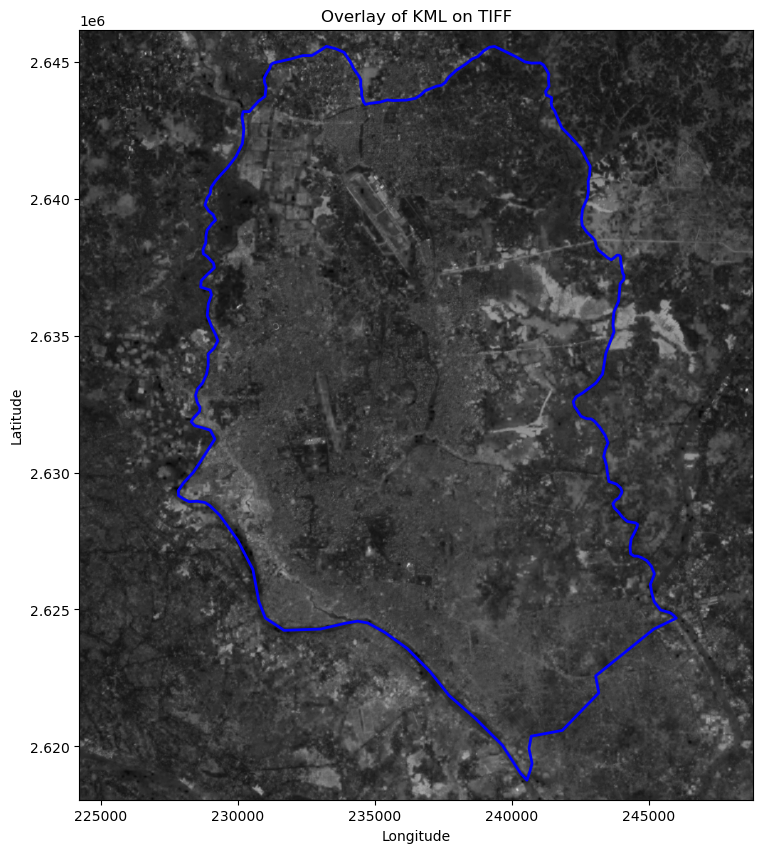

In [3]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import mapping

# Load the TIFF file
with rasterio.open("./Landsat8/cropped_bbox/2013/LC08_L2SP_137044_20131224_20200912_02_T1_SR_B2.TIF") as src:
    # Read the TIFF image data
    tiff_data = src.read(1)
    # Get the extent (bounds) of the TIFF for plotting
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
    tiff_crs = src.crs  # Get the CRS of the TIFF file

# Load the KML file
kml_gdf = gpd.read_file("dhaka_cIty_gis_project.kml", driver="KML", allow_unsupported_drivers=True)

# Reproject the KML to match the TIFF CRS
if kml_gdf.crs != tiff_crs:
    kml_gdf = kml_gdf.to_crs(tiff_crs)

# Plot the TIFF image
plt.figure(figsize=(10, 10))
plt.imshow(tiff_data, cmap='gray', extent=extent)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Plot the KML features
kml_gdf.boundary.plot(ax=plt.gca(), color='blue', linewidth=2)

# Add a title and show the plot
plt.title("Overlay of KML on TIFF")
plt.show()